In [1]:
# load dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import time

In [2]:
# read in data
raw_data = pd.read_csv("data.csv")

In [3]:
# remove NaN column
raw_data = raw_data.iloc[:,:-1]
# change 'diagnosis' column values to 1 or 0
raw_data['diagnosis'] = raw_data['diagnosis'].apply(lambda x: '1' if x == 'M' else '0')
# change 'id' column to index
raw_data = raw_data.set_index('id')

# assign X, y data set and split to training and testing data sets
y = raw_data['diagnosis'].values
X = raw_data.drop('diagnosis', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

In [4]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

print('The accuracy on the training subset: {:.3f}'.format(svm_model.score(X_train_scaled, y_train)))
print('The accuracy on the testing subset: {:.3f}'.format(svm_model.score(X_test_scaled, y_test)))

The accuracy on the training subset: 0.987
The accuracy on the testing subset: 0.977


In [6]:
predictions = svm_model.predict(X_test_scaled)
print(confusion_matrix(y_test, predictions))

[[106   2]
 [  2  61]]


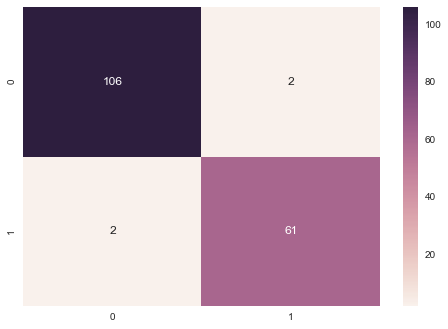

In [7]:
cm = confusion_matrix(y_test, predictions)                   
sns.heatmap(cm,annot=True,fmt="d")
plt.show()